In [1]:
from datasets import load_dataset
import pandas as pd

/Users/vetonmatoshi/opt/anaconda3/envs/bfh/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import tiktoken
tokenizer = tiktoken.encoding_for_model("gpt-3.5-turbo")

# Count labels per config

In [3]:
all_tasks = [
    "swiss_criticality_prediction_bge_considerations",
    "swiss_criticality_prediction_bge_facts",
    "swiss_criticality_prediction_citation_considerations",
    "swiss_criticality_prediction_citation_facts",
    "swiss_judgment_prediction_xl_considerations",
    "swiss_judgment_prediction_xl_facts",
    "swiss_law_area_prediction_facts",
    "swiss_law_area_prediction_considerations",
    "swiss_law_area_prediction_sub_area_considerations",
    "swiss_law_area_prediction_sub_area_facts"
  ]

for t in all_tasks:
    dataset = load_dataset("joelito/lextreme", t)
    labels = set()
    for split in ['train','validation', 'test']:
        for l in dataset[split].features['label'].names:
            labels.add(l)
    print(t,': ',len(labels))
    
    

Found cached dataset lextreme (/Users/vetonmatoshi/.cache/huggingface/datasets/joelito___lextreme/swiss_criticality_prediction_bge_considerations/1.0.0/1ff43827e332c8df88094d1f980fbd6d1a4d5fe8733b85cd37e7e3b20290b789)
100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 33.86it/s]


swiss_criticality_prediction_bge_considerations :  2


KeyboardInterrupt: 

# Check if any input exceeds 4096

In [4]:
all_data = []
for task in all_tasks:
    df = pd.read_json("../data/instruction-following-examples/"+task+".jsonl", lines=True)
    df['finetuning_task']=task
    all_data.append(df)
all_data = pd.concat(all_data)
all_data['length']=all_data.input_text.apply(lambda x: len(tokenizer.encode(x)))
all_data[all_data.length>4000]
    

,input_text,language,answer,finetuning_task,length


<AxesSubplot: >

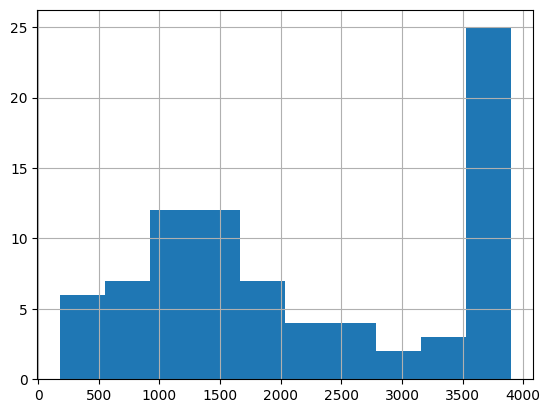

In [5]:
all_data.length.hist()

<AxesSubplot: xlabel='finetuning_task,language'>

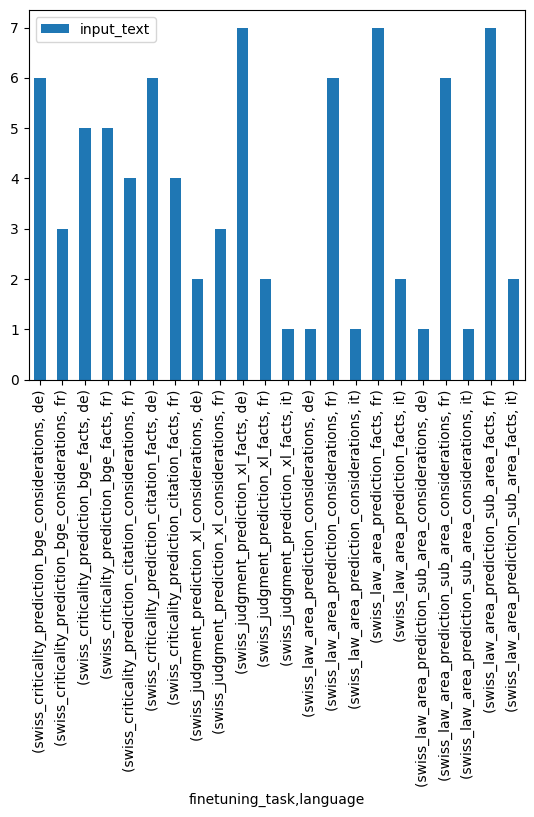

In [6]:
all_data[['input_text','finetuning_task','language']].groupby(['finetuning_task','language']).count().plot.bar()

In [127]:
print(all_data[all_data.finetuning_task=='swiss_criticality_prediction_citation_facts'].input_text.tolist()[0])

Given the facts from the following Swiss Federal Supreme Court Decision:
"Faits :
A.
Depuis le 8 juillet 2014, le Ministère public, Parquet régional de Neuchâtel, mène une instruction pénale contre B._ pour infractions à l'art. 19 al. 1 et 2 de la loi fédérale du 3 octobre 1951 sur les stupéfiants et les substances psychotropes (LStup; RS 812.121). Le 9 octobre 2014, A._ a été mis en prévention pour les mêmes faits et chefs d'infraction. Ceux-ci ont été étendus le 29 novembre 2014 à celui de blanchiment d'argent (art. 305bis CP). D'autres prévenus, dont C._ et D._, ont également été mis en cause. Le dernier susmentionné et B._ ont été arrêtés le 3 septembre 2015 et placés en détention provisoire. Le premier a été libéré en janvier 2016, tandis que le second a été maintenu en détention. Au cours de l'enquête, des demandes d'autorisation de mesures de surveillance et d'investigation secrète, ainsi que de placement en détention provisoire, respectivement de prolongation de ces mesures, on

# Predictions

In [7]:
all_data = []
for task in all_tasks:
    df = pd.read_json("../data/zero-shot-predictions/"+task+"_predictions.jsonl", lines=True)
    df['finetuning_task']=task
    all_data.append(df)
all_data = pd.concat(all_data)
all_data['length']=all_data.input_text.apply(lambda x: len(tokenizer.encode(x)))
all_data

ValueError: Expected object or value